In [1]:
import dask.bag as db
import dask.dataframe as dd
import pandas as pd
import json
import seaborn as sns

from os import path
from wordcloud import WordCloud
from pylab import rcParams

import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# read the entire file into a python array
with open('Data/yelp_academic_dataset_review.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df_review = pd.read_json(data_json_str)

df_review.head(5)


business_id       date               review_id  stars  \
0  5UmKMjUEUNdYWqANhGckJw 2012-08-01  Ya85v4eqdd6k9Od8HbQjyA      4   
1  5UmKMjUEUNdYWqANhGckJw 2014-02-13  KPvLNJ21_4wbYNctrOwWdQ      5   
2  5UmKMjUEUNdYWqANhGckJw 2015-10-31  fFSoGV46Yxuwbr3fHNuZig      5   
3  UsFtqoBl7naz8AVUBZMjQQ 2013-11-08  Di3exaUCFNw1V4kSNW5pgA      5   
4  UsFtqoBl7naz8AVUBZMjQQ 2014-03-29  0Lua2-PbqEQMjD9r89-asw      3   

                                                text    type  \
0  Mr Hoagie is an institution. Walking in, it do...  review   
1  Excellent food. Superb customer service. I mis...  review   
2  Yes this place is a little out dated and not o...  review   
3  All the food is great here. But the best thing...  review   
4  We checked this place out this past Monday for...  review   

                  user_id                                 votes  
0  PUFPaY9KxDAcGqfsorJp3Q  {'funny': 0, 'useful': 0, 'cool': 0}  
1  Iu6AxdBYGR4A0wspR9BYHA  {'funny': 0, 'useful': 0, 'cool': 0}  
2  auESFwWvW42h6alXgFxAXQ  {'funny': 0, 'useful': 0, 'cool': 0}  
3  uK8tzraOp4M5u3uYrqIBXg  {'funny': 0, 'useful': 0, 'cool': 0}  
4  I_47G-R2_egp7ME5u_ltew  {'funny': 0, 'useful': 0, 'cool': 0}

In [3]:
# read the entire file into a python array
with open('Data/yelp_academic_dataset_tip.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df_tip = pd.read_json(data_json_str)

df_tip.head(5)

business_id       date  likes  \
0  cE27W9VPgO88Qxe4ol6y_g 2013-04-18      0   
1  mVHrayjG3uZ_RLHkLj-AMg 2013-01-06      1   
2  KayYbHCt-RkbGcPdGOThNg 2013-12-03      0   
3  KayYbHCt-RkbGcPdGOThNg 2015-07-08      0   
4  1_lU0-eSWJCRvNGk78Zh9Q 2015-10-25      0   

                                                text type  \
0                             Don't waste your time.  tip   
1  Your GPS will not allow you to find this place...  tip   
2                              Great drink specials!  tip   
3  Friendly staff, good food, great beer selectio...  tip   
4                             Beautiful restoration.  tip   

                  user_id  
0  -6rEfobYjMxpUWLNxszaxQ  
1  EZ0r9dKKtEGVx2CdnowPCw  
2  xb6zEQCw9I-Gl0g06e1KsQ  
3  QawZN4PSW7ng_9SP7pjsVQ  
4  MLQre1nvUtW-RqMTc4iC9A

In [4]:
import re
from collections import defaultdict

Months = {
     1:"January",
     2:"February",
     3:"March",
     4:"April",
     5:"May",
     6:"June",
     7:"July",
     8:"August",
     9:"September",
    10:"October",
    11:"November",
    12:"December"
}
#[^a-zA-Z0-9 \t\n\r\v\f] Non-alphanumeric or whitespace.
wcounts = {}
wcounts["TOTAL"] = defaultdict(int)
WordsInMonth = defaultdict(int)

for i in range(1,13):
    wcounts[Months[i]] = defaultdict(int)
    numReviews = 0
    numTips = 0
    for review in df_review.loc[df_review['date'].dt.month == i].text.values:
        numReviews += 1
        for Rword in re.sub("[^a-zA-Z0-9 \t\n\r\v\f]","",review).split():
            wcounts[Months[i]][Rword.lower()] += 1
            wcounts["TOTAL"][Rword.lower()] += 1
            WordsInMonth[Months[i]] += 1
    for tip in df_tip.loc[df_tip['date'].dt.month == i].text.values:
        numTips += 1
        for Tword in re.sub("[^a-zA-Z0-9 \t\n\r\v\f]","",tip).split():
            wcounts[Months[i]][Tword.lower()] += 1
            wcounts["TOTAL"][Tword.lower()] += 1
            WordsInMonth[Months[i]] += 1
    print(Months[i]+": "+str(numReviews)+" Reviews; "+str(numTips)+" Tips; Total Words: "+str(WordsInMonth[Months[i]]))

January: 170941 Reviews; 42452 Tips; Total Words: 21495554
February: 154833 Reviews; 42022 Tips; Total Words: 19242088
March: 181417 Reviews; 52616 Tips; Total Words: 22302163
April: 176704 Reviews; 50831 Tips; Total Words: 21592729
May: 183310 Reviews; 53979 Tips; Total Words: 22208416
June: 190490 Reviews; 54312 Tips; Total Words: 23077756
July: 213509 Reviews; 59522 Tips; Total Words: 25686747
August: 216273 Reviews; 58809 Tips; Total Words: 25740204
September: 189777 Reviews; 45635 Tips; Total Words: 22690032
October: 191808 Reviews; 44968 Tips; Total Words: 22304640
November: 183120 Reviews; 42916 Tips; Total Words: 21393786
December: 173031 Reviews; 43802 Tips; Total Words: 20773884


In [16]:
anthroReviews = df_review.loc[df_review['text'].str.contains("nthropomorphizing")]
anthroTips = df_tip.loc[df_review['text'].str.contains("nthropomorphizing")]
anthroReviews.shape


(2, 8)

In [5]:

import operator
# Regularization term? *(MonthlyWordCounts["January"]/MonthlyWordCounts[Months[m]])
def getMonthlyUsages(word, MonthlyDict, MonthlyWordCounts):
    monthlyUses = []
    for m in Months:
        if(word in MonthlyDict[Months[m]].keys()):
            monthlyUses.append(MonthlyDict[Months[m]][word])        
        else:
            monthlyUses.append(0);
    return monthlyUses

def printUsageStats(word, MonthlyUsage):
    print("Usage Statistics for "+word+":")
    TotalUses = sum(MonthlyUsage)
    print("Total Uses:", TotalUses)
    for m in Months:
        usagePercent = round(100*MonthlyUsage[m-1]/TotalUses,1)
        print(Months[m]+": "+str(round(MonthlyUsage[m-1],0))+" uses, "+str(usagePercent)+"%")


#Calculates a words frequency range between its highest usage month, and its lowest usage month:
#For example, if a word is used the exact same number of times in all 12 months (each month's frequency is 8.5%), this will return 0,
#however if a word is used 2x more in one month than another, the value returned would be the percentage gap between those two months.
def frequencyMaxMinAndMonthlyUses(word, MonthlyDict):
        TotalUses = MonthlyDict["TOTAL"][word]
        monthlyUses = []
        for m in Months:
            if(word in MonthlyDict[Months[m]].keys()):
                monthlyUses.append(MonthlyDict[Months[m]][word])        
            else:
                monthlyUses.append(0)
        maxF = (100*(max(monthlyUses)))/TotalUses
        minF = (100*(min(monthlyUses)))/TotalUses
        return maxF,minF, monthlyUses
        
sorted_word_counts = sorted(wcounts["TOTAL"].items(),key=operator.itemgetter(1))
sorted_word_counts.reverse()
TopWords = [x[0] for x in sorted_word_counts[:100]]
print(TopWords)



['the', 'and', 'i', 'a', 'to', 'was', 'of', 'it', 'is', 'for', 'in', 'my', 'that', 'with', 'this', 'we', 'but', 'you', 'they', 'on', 'have', 'not', 'had', 'so', 'at', 'were', 'are', 'good', 'place', 'food', 'be', 'as', 'great', 'there', 'me', 'very', 'all', 'if', 'here', 'out', 'like', 'just', 'its', 'get', 'our', 'service', 'one', 'time', 'from', 'their', 'when', 'or', 'up', 'would', 'back', 'go', 'about', 'an', 'really', 'will', 'what', 'some', 'which', 'your', 'been', 'no', 'he', 'can', 'more', 'only', 'also', 'she', 'by', 'dont', 'us', 'nice', 'because', 'got', 'them', 'best', 'even', 'other', 'too', 'im', 'well', 'do', 'love', 'after', 'has', 'ive', 'always', 'than', 'little', 'didnt', 'first', 'did', 'ordered', 'try', 'staff', 'much']


Usage Statistics for pizza:
Total Uses: 232671
January: 19079 uses, 8.2%
February: 16396 uses, 7.0%
March: 18933 uses, 8.1%
April: 18179 uses, 7.8%
May: 18527 uses, 8.0%
June: 19734 uses, 8.5%
July: 22222 uses, 9.6%
August: 22407 uses, 9.6%
September: 19946 uses, 8.6%
October: 19665 uses, 8.5%
November: 19542 uses, 8.4%
December: 18041 uses, 7.8%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


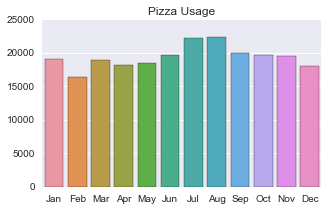

In [6]:
shortMonths =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

rcParams['figure.figsize'] = 5,3 
PizzaUsage = getMonthlyUsages("pizza", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,PizzaUsage)
ax.set_title("Pizza Usage")
printUsageStats("pizza", PizzaUsage)


Usage Statistics for burger:
Total Uses: 165603
January: 13804 uses, 8.3%
February: 11694 uses, 7.1%
March: 14090 uses, 8.5%
April: 13707 uses, 8.3%
May: 13467 uses, 8.1%
June: 14414 uses, 8.7%
July: 15863 uses, 9.6%
August: 15900 uses, 9.6%
September: 13711 uses, 8.3%
October: 13288 uses, 8.0%
November: 12836 uses, 7.8%
December: 12829 uses, 7.7%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


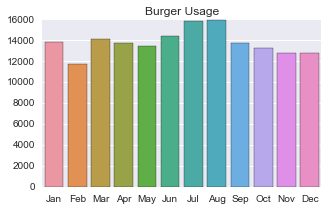

In [26]:
rcParams['figure.figsize'] = 5,3 
burgerUsage = getMonthlyUsages("burger", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,burgerUsage)
ax.set_title("Burger Usage")
printUsageStats("burger", burgerUsage)

Usage Statistics for beer:
Total Uses: 139990
January: 10982 uses, 7.8%
February: 10214 uses, 7.3%
March: 12098 uses, 8.6%
April: 11596 uses, 8.3%
May: 11287 uses, 8.1%
June: 11918 uses, 8.5%
July: 13156 uses, 9.4%
August: 13203 uses, 9.4%
September: 12202 uses, 8.7%
October: 12046 uses, 8.6%
November: 11150 uses, 8.0%
December: 10138 uses, 7.2%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


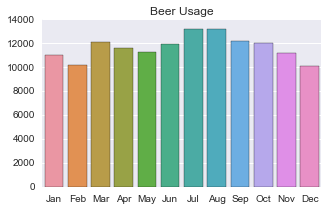

In [28]:
searchWord = "Beer"
sW = searchWord.lower()
rcParams['figure.figsize'] = 5,3 
sW_Usage = getMonthlyUsages(sW, wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,sW_Usage)
ax.set_title( searchWord + " Usage")
printUsageStats(sW, sW_Usage)

Usage Statistics for disappointed:
Total Uses: 93992
January: 7143 uses, 7.6%
February: 6581 uses, 7.0%
March: 7708 uses, 8.2%
April: 7442 uses, 7.9%
May: 7732 uses, 8.2%
June: 8240 uses, 8.8%
July: 9051 uses, 9.6%
August: 9144 uses, 9.7%
September: 8076 uses, 8.6%
October: 7916 uses, 8.4%
November: 7707 uses, 8.2%
December: 7252 uses, 7.7%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


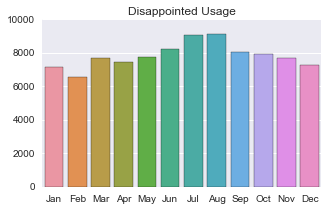

In [30]:
searchWord = "Disappointed"
sW = searchWord.lower()
rcParams['figure.figsize'] = 5,3 
sW_Usage = getMonthlyUsages(sW, wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,sW_Usage)
ax.set_title( searchWord + " Usage")
printUsageStats(sW, sW_Usage)

Usage Statistics for tartan:
Total Uses: 151
January: 9 uses, 6.0%
February: 0 uses, 0.0%
March: 7 uses, 4.6%
April: 8 uses, 5.3%
May: 33 uses, 21.9%
June: 15 uses, 9.9%
July: 25 uses, 16.6%
August: 24 uses, 15.9%
September: 9 uses, 6.0%
October: 10 uses, 6.6%
November: 9 uses, 6.0%
December: 2 uses, 1.3%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


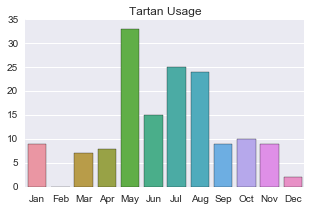

In [7]:
rcParams['figure.figsize'] = 5,3 
tartanUsage = getMonthlyUsages("tartan", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,tartanUsage)
ax.set_title("Tartan Usage")
printUsageStats("tartan", tartanUsage)

Usage Statistics for baseball:
Total Uses: 4029
January: 216 uses, 5.4%
February: 192 uses, 4.8%
March: 680 uses, 16.9%
April: 461 uses, 11.4%
May: 343 uses, 8.5%
June: 340 uses, 8.4%
July: 335 uses, 8.3%
August: 389 uses, 9.7%
September: 328 uses, 8.1%
October: 406 uses, 10.1%
November: 199 uses, 4.9%
December: 140 uses, 3.5%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


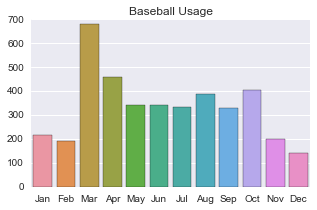

In [37]:
searchWord = "Baseball"
sW = searchWord.lower()
rcParams['figure.figsize'] = 5,3 
sW_Usage = getMonthlyUsages(sW, wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,sW_Usage)
ax.set_title( searchWord + " Usage")
printUsageStats(sW, sW_Usage)

Usage Statistics for peppermint:
Total Uses: 953
January: 125 uses, 13.1%
February: 38 uses, 4.0%
March: 59 uses, 6.2%
April: 48 uses, 5.0%
May: 29 uses, 3.0%
June: 38 uses, 4.0%
July: 54 uses, 5.7%
August: 52 uses, 5.5%
September: 33 uses, 3.5%
October: 46 uses, 4.8%
November: 131 uses, 13.7%
December: 300 uses, 31.5%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


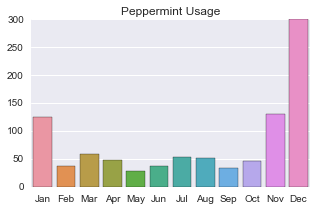

In [38]:
searchWord = "Peppermint"
sW = searchWord.lower()
rcParams['figure.figsize'] = 5,3 
sW_Usage = getMonthlyUsages(sW, wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,sW_Usage)
ax.set_title( searchWord + " Usage")
printUsageStats(sW, sW_Usage)

Usage Statistics for ac:
Total Uses: 13597
January: 385 uses, 2.8%
February: 343 uses, 2.5%
March: 627 uses, 4.6%
April: 854 uses, 6.3%
May: 1158 uses, 8.5%
June: 2109 uses, 15.5%
July: 2589 uses, 19.0%
August: 2323 uses, 17.1%
September: 1479 uses, 10.9%
October: 795 uses, 5.8%
November: 514 uses, 3.8%
December: 421 uses, 3.1%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


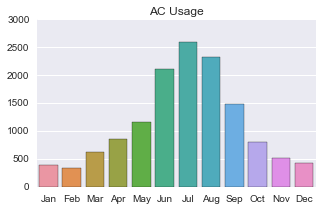

In [39]:
searchWord = "AC"
sW = searchWord.lower()
rcParams['figure.figsize'] = 5,3 
sW_Usage = getMonthlyUsages(sW, wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,sW_Usage)
ax.set_title( searchWord + " Usage")
printUsageStats(sW, sW_Usage)

Usage Statistics for pumpkin:
Total Uses: 9207
January: 616 uses, 6.7%
February: 442 uses, 4.8%
March: 371 uses, 4.0%
April: 286 uses, 3.1%
May: 313 uses, 3.4%
June: 295 uses, 3.2%
July: 286 uses, 3.1%
August: 424 uses, 4.6%
September: 939 uses, 10.2%
October: 2300 uses, 25.0%
November: 1888 uses, 20.5%
December: 1047 uses, 11.4%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


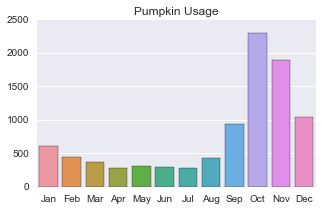

In [9]:
rcParams['figure.figsize'] = 5,3 
pumpkinUsage = getMonthlyUsages("pumpkin", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,pumpkinUsage)
ax.set_title("Pumpkin Usage")
printUsageStats("pumpkin", pumpkinUsage)

Usage Statistics for hikes:
Total Uses: 394
January: 34 uses, 8.6%
February: 37 uses, 9.4%
March: 54 uses, 13.7%
April: 36 uses, 9.1%
May: 34 uses, 8.6%
June: 30 uses, 7.6%
July: 27 uses, 6.9%
August: 14 uses, 3.6%
September: 22 uses, 5.6%
October: 35 uses, 8.9%
November: 37 uses, 9.4%
December: 34 uses, 8.6%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


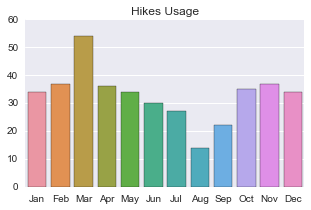

In [10]:
rcParams['figure.figsize'] = 5,3 
hikesUsage = getMonthlyUsages("hikes", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,hikesUsage)
ax.set_title("Hikes Usage")
printUsageStats("hikes", hikesUsage)

Usage Statistics for imadake:
Total Uses: 133
January: 10 uses, 7.5%
February: 4 uses, 3.0%
March: 13 uses, 9.8%
April: 3 uses, 2.3%
May: 7 uses, 5.3%
June: 5 uses, 3.8%
July: 12 uses, 9.0%
August: 9 uses, 6.8%
September: 12 uses, 9.0%
October: 7 uses, 5.3%
November: 18 uses, 13.5%
December: 33 uses, 24.8%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


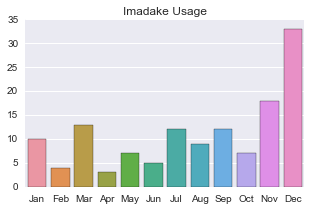

In [11]:
rcParams['figure.figsize'] = 5,3 
imadakeUsage = getMonthlyUsages("imadake", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths, imadakeUsage)
ax.set_title("Imadake Usage")
printUsageStats("imadake", imadakeUsage)

Usage Statistics for kbbq:
Total Uses: 933
January: 55 uses, 5.9%
February: 49 uses, 5.3%
March: 41 uses, 4.4%
April: 45 uses, 4.8%
May: 54 uses, 5.8%
June: 76 uses, 8.1%
July: 77 uses, 8.3%
August: 139 uses, 14.9%
September: 141 uses, 15.1%
October: 94 uses, 10.1%
November: 103 uses, 11.0%
December: 59 uses, 6.3%


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


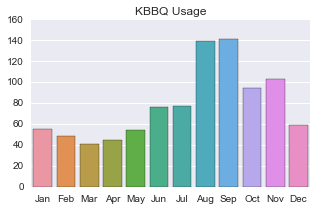

In [12]:
rcParams['figure.figsize'] = 5,3 
kbbqUsage = getMonthlyUsages("kbbq", wcounts, WordsInMonth)
ax = sns.barplot(shortMonths,kbbqUsage)
ax.set_title("KBBQ Usage")
printUsageStats("kbbq", kbbqUsage)

In [13]:
import copy

wcounts2 = copy.deepcopy(wcounts)

#FILTER WORDS FOR THE WORD CLOUDS!
#Remove words that are too uniform, maxF - minF <20
#Remove Words that were used less than 10 times.
#Remove Words from the months they were used closer to the min.
allwords = list(wcounts2["TOTAL"].keys())
for word in allwords:
    maxF,minF,monthlyUses = frequencyMaxMinAndMonthlyUses(word, wcounts2)
    remove = 'N'
    if(((maxF - minF)<10) or (wcounts2["TOTAL"][word] < 10)):
        remove = 'Y'
    for m in Months:
        if(remove == 'Y'):
            wcounts2[Months[m]].pop(word, None)
        else:
            distToMax = abs(max(monthlyUses) - monthlyUses[m-1])
            distToMin = abs(min(monthlyUses) - monthlyUses[m-1])
            if(distToMax > distToMin):
                wcounts2[Months[m]].pop(word, None)
        


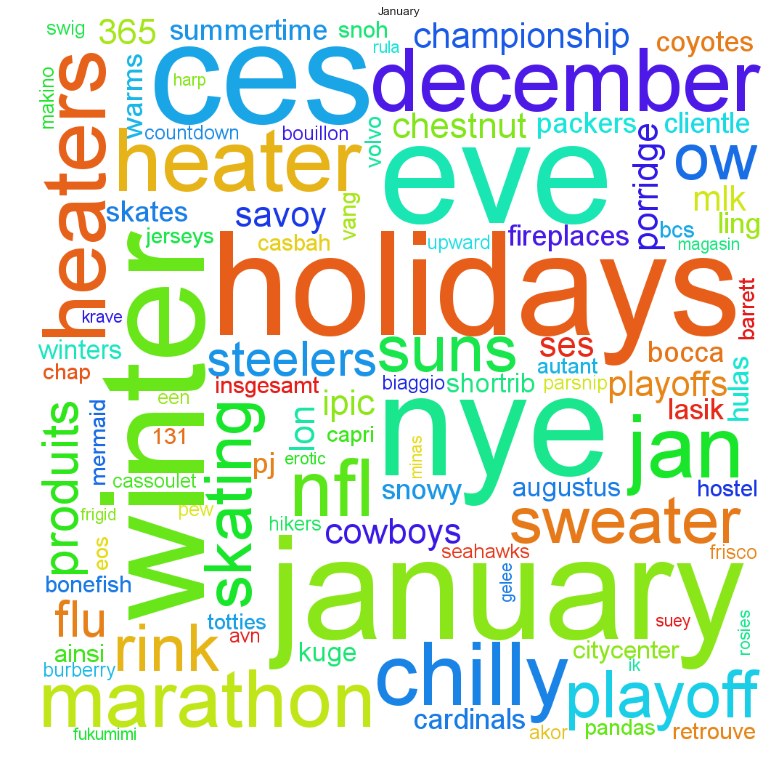

In [14]:

rcParams['figure.figsize'] = 13, 13 
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["January"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("January")

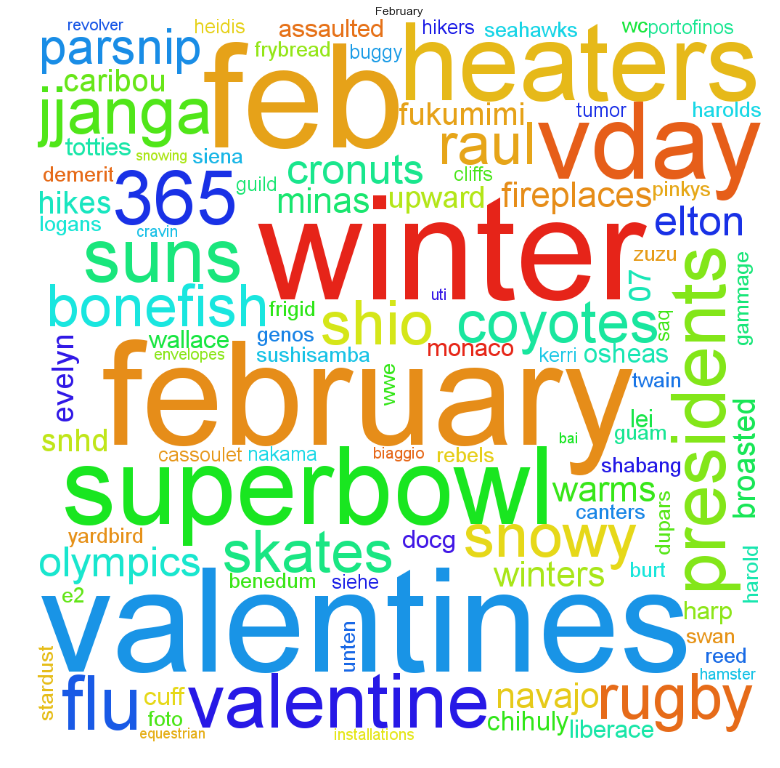

In [15]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["February"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("February")

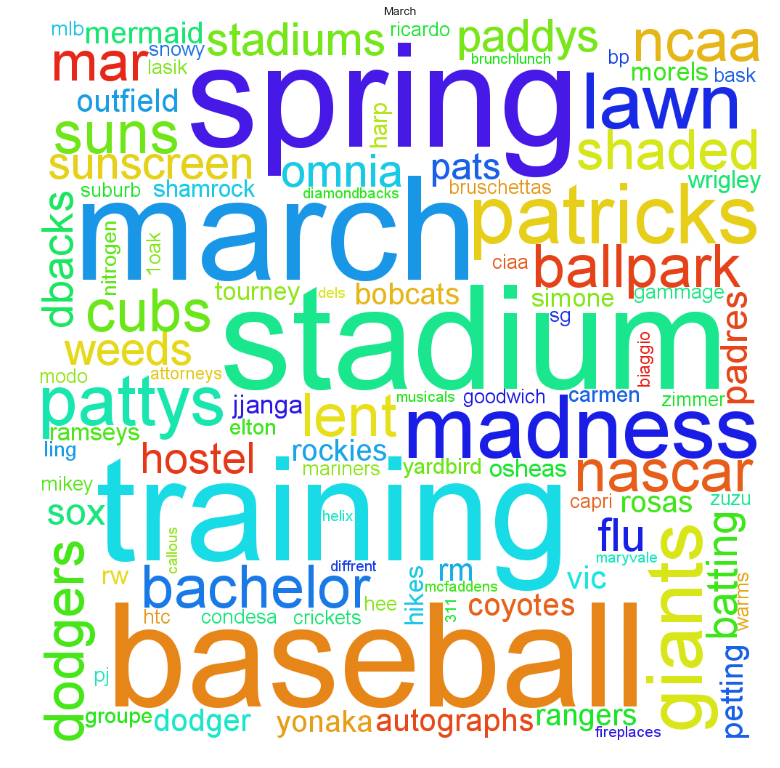

In [16]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["March"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("March")

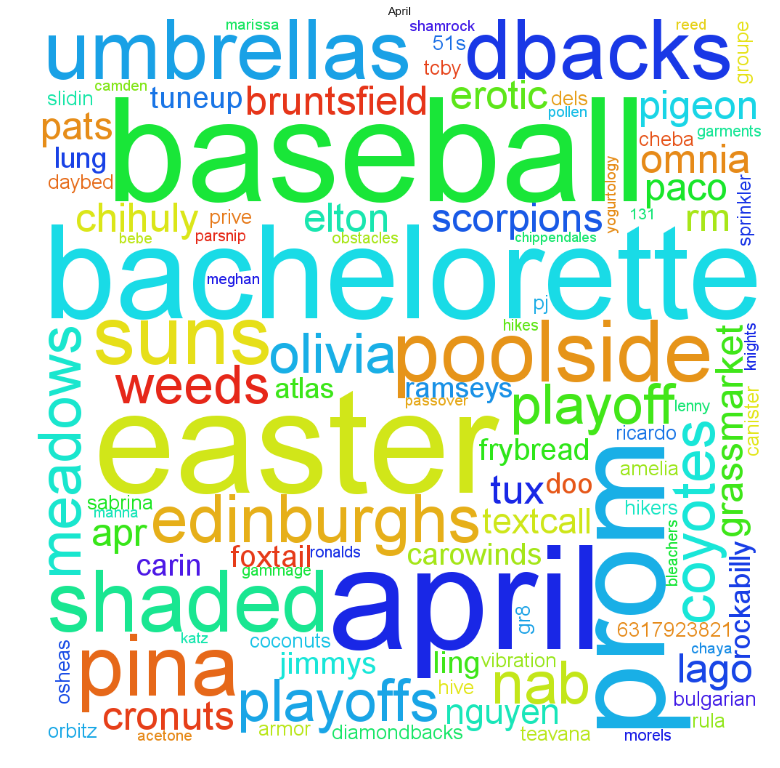

In [17]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["April"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("April")

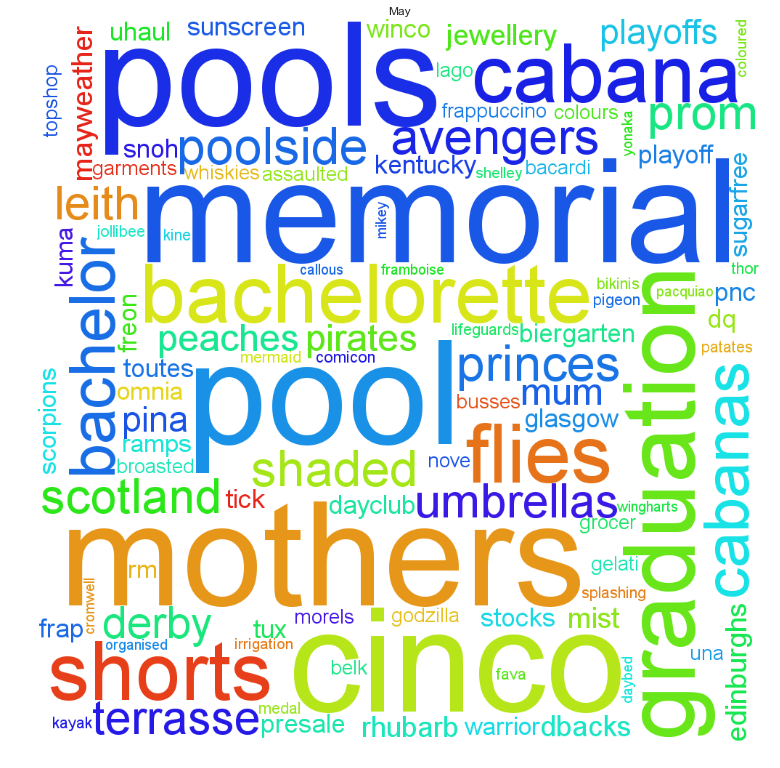

In [18]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["May"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("May")

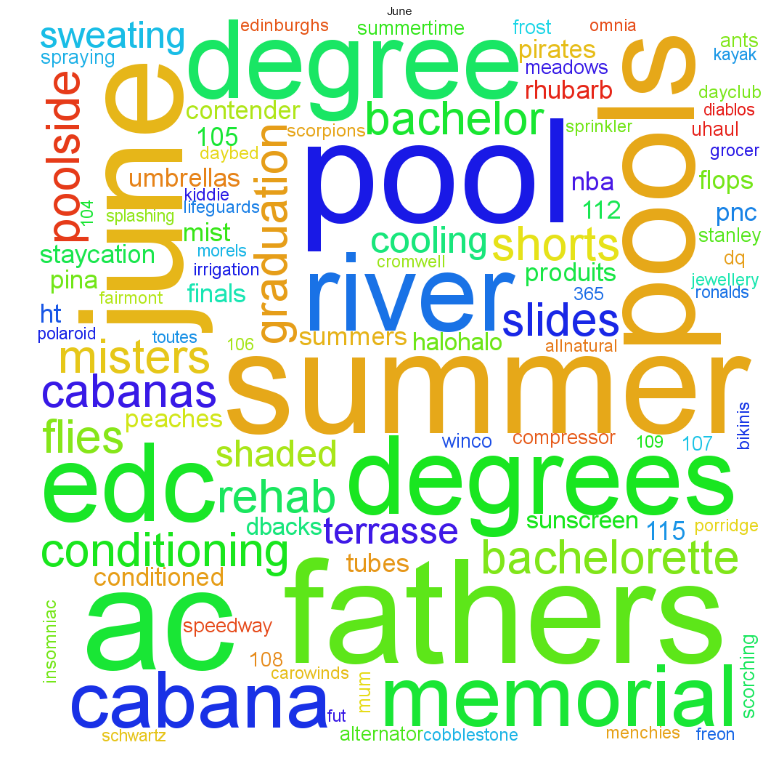

In [19]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["June"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("June")

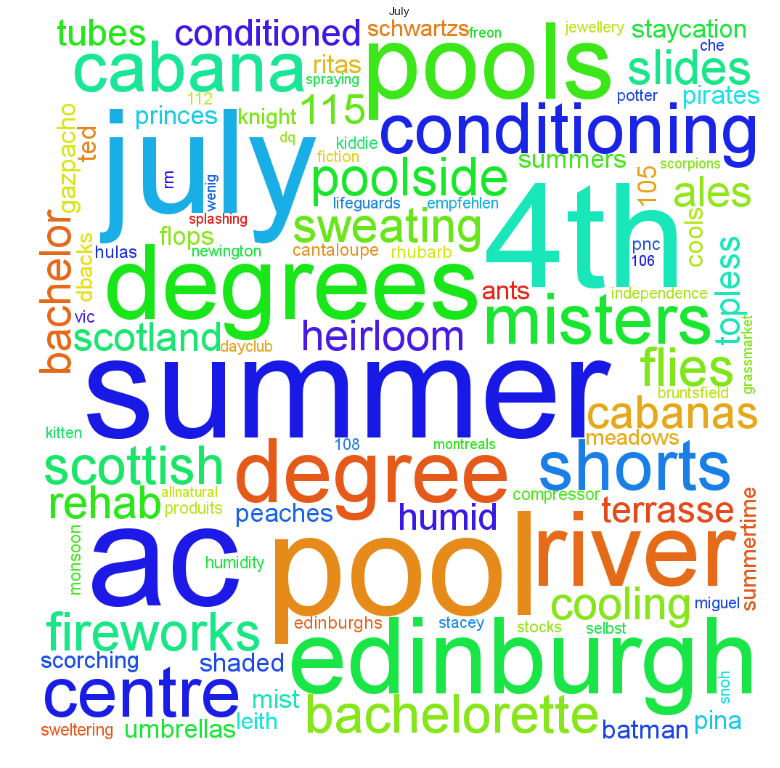

In [20]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["July"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("July")

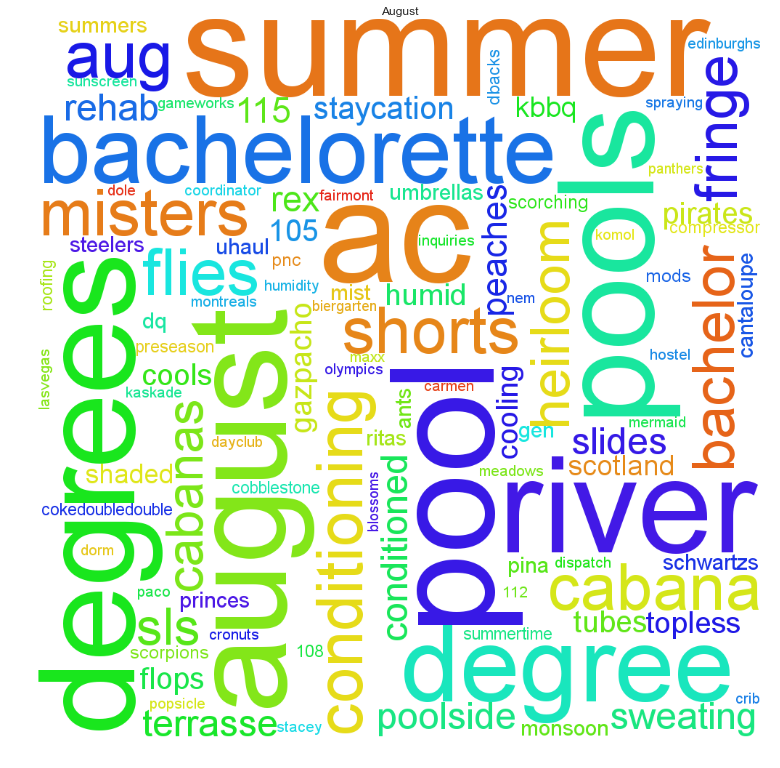

In [21]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["August"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("August")

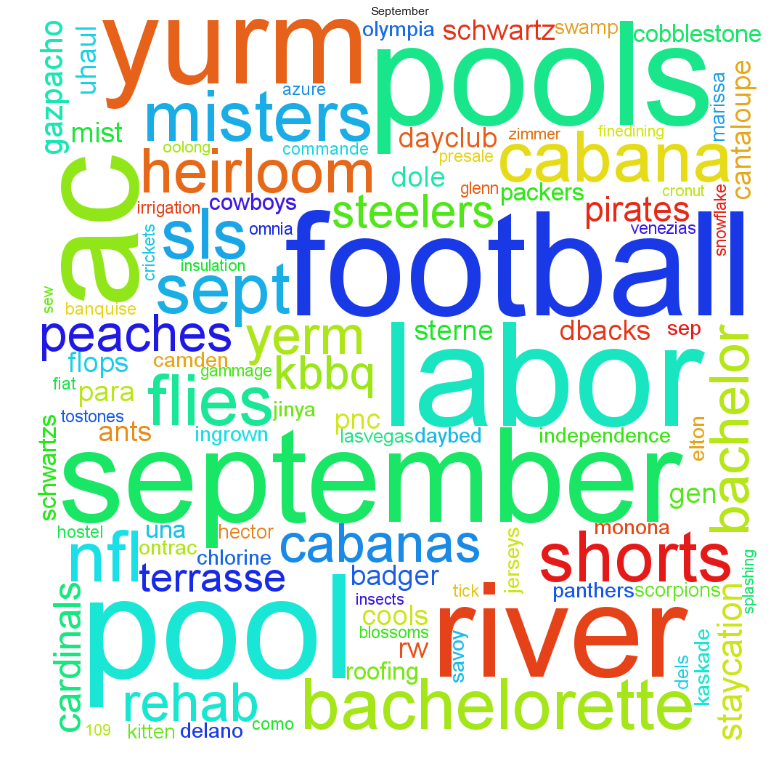

In [22]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["September"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("September")

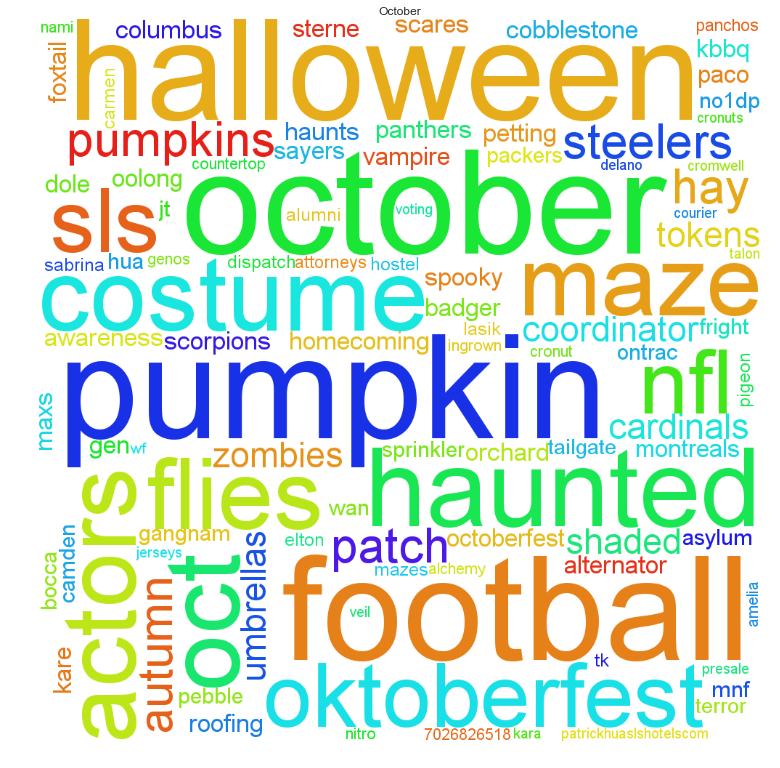

In [23]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["October"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("October")

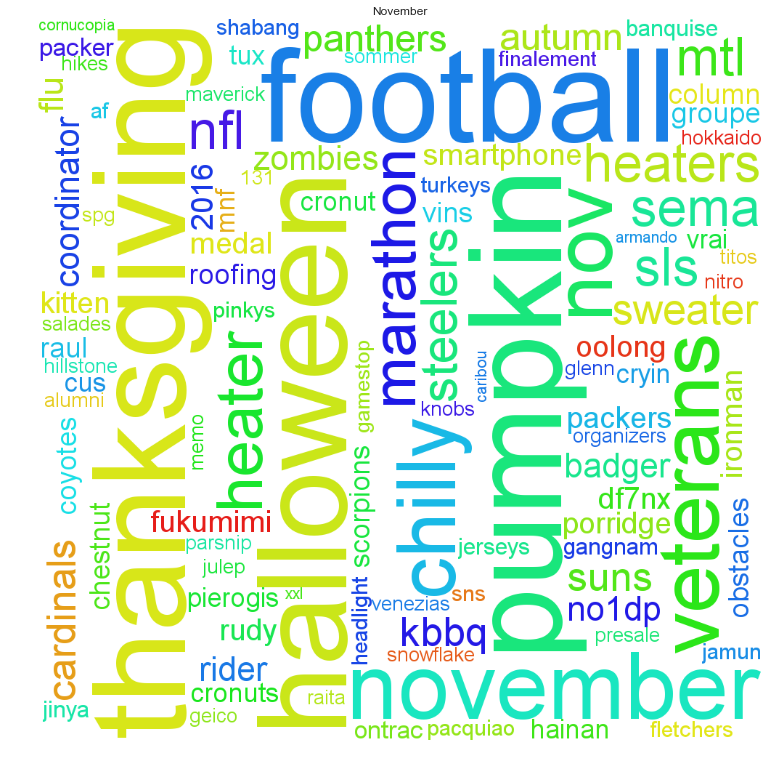

In [24]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["November"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("November")

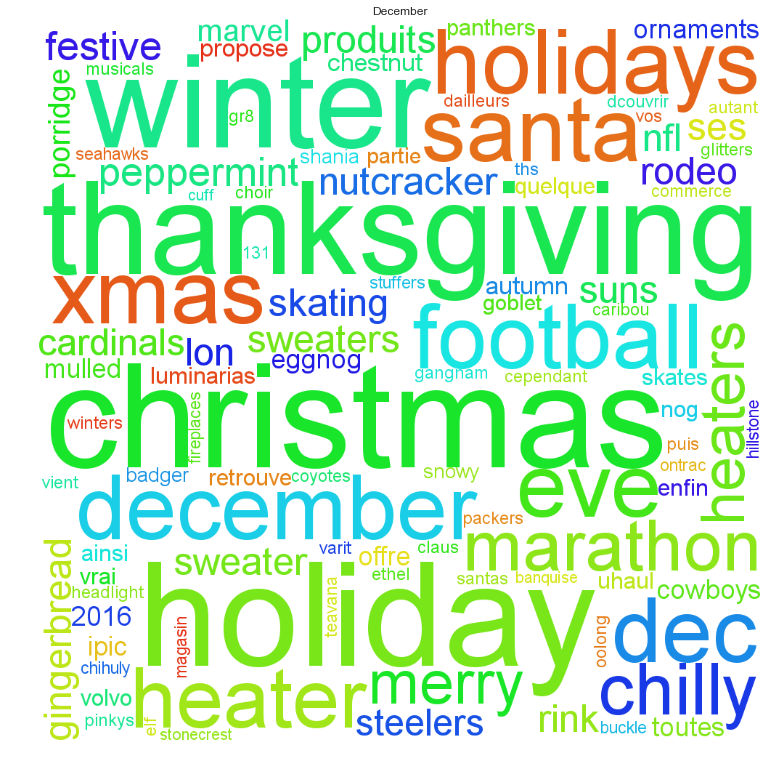

In [25]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200, background_color="white").generate_from_frequencies(wcounts2["December"].items())
rcParams['figure.figsize'] = 13, 13
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("December")